# Tensorflow/Keras for Classification

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# We use the Breast Cancer Wisconsin (Diagnostic) Dataset
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [6]:
df = pd.read_csv('../data/cancer_classification.csv')

### 1. Data Exploration

In [7]:
# Check if any nulls, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
# Explore mean/min/max values for each feature
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

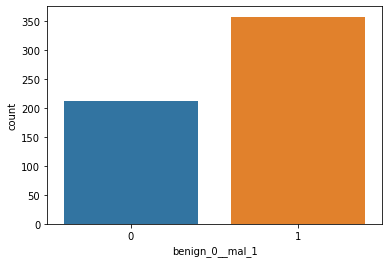

In [10]:
# Are class counts well balanced?
sns.countplot(data=df,x='benign_0__mal_1')

<AxesSubplot:>

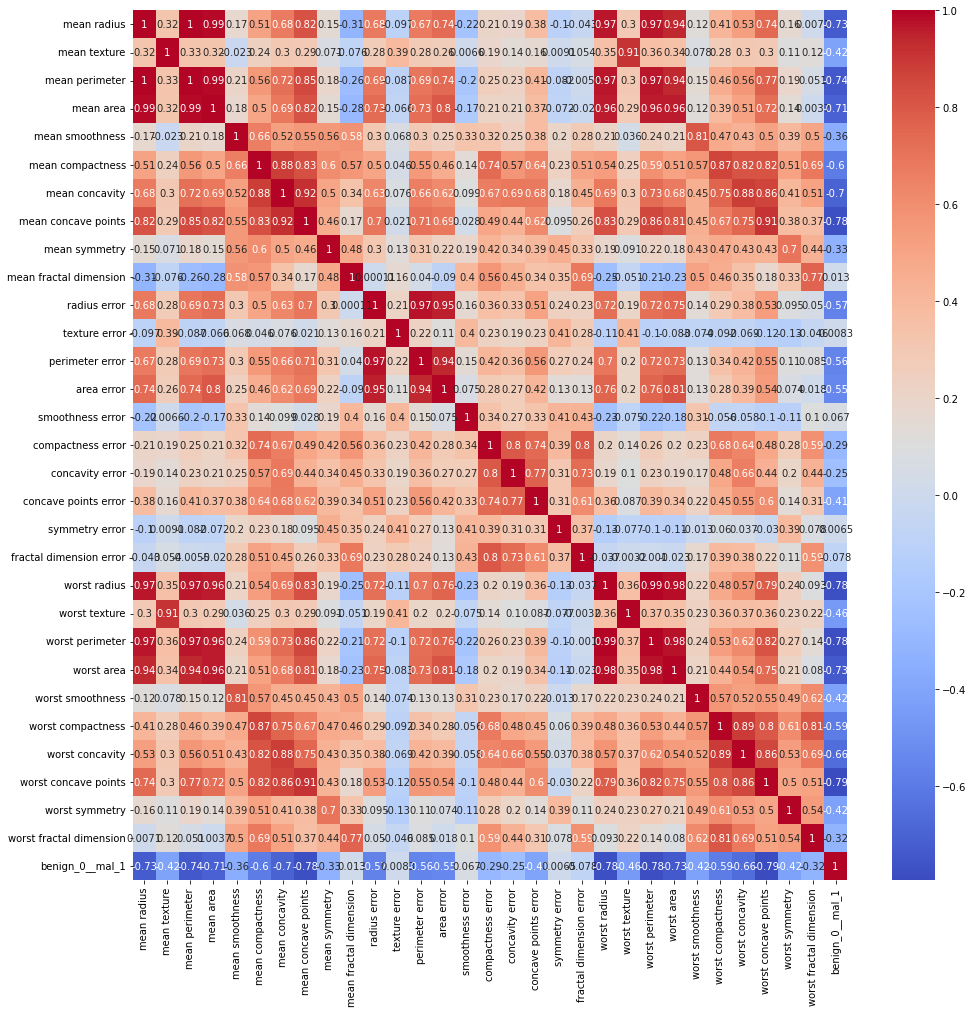

In [13]:
# What do correlations look like?
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

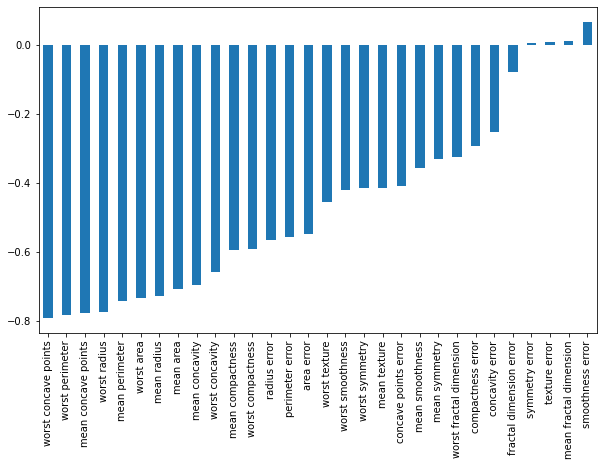

In [12]:
# Which are the highest correlated values with the diagnosis?
# High negative correlations appear
plt.figure(figsize=(10,6))
#df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
df.corr()['benign_0__mal_1'].drop('benign_0__mal_1').sort_values().plot(kind='bar')

#### Extract features and target

In [14]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
# Train/test split
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Scale
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

### 2. Create and Train Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [22]:
# Since we have 30 features, it makes sense to use 30 input neurons
X_train.shape

(426, 30)

In [23]:
# Some guidelines concerning MLPs
# Number of input neurons: number of features
# Number of output neurons: target value size: number of classes, number of continuous values, etc.
# Hidden layers
# - Number of layers: rule of thumb: usually 1 or max 2
# - Number of neurons: close to the mean between input and output
# Use dropout to prevent overfitting
# Use early stopping with the validation data
# Batch size
# - large batch sizes result in faster training
# - but the model fails to generalize when large batch sizes used

#### Model 1: No measures for overfitting

In [24]:
model = Sequential()

# Decrease the number of neurons in each layer
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# Binary classification: we need the sigmoid to map the values to [0,1]
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [26]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

2021-11-06 15:41:39.998781: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-06 15:41:39.999780: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6608 - val_loss: 0.6282
Epoch 2/600
426/426 [==============================] - 0s 97us/sample - loss: 0.6203 - val_loss: 0.5828
Epoch 3/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5778 - val_loss: 0.5349
Epoch 4/600
426/426 [==============================] - 0s 102us/sample - loss: 0.5337 - val_loss: 0.4788
Epoch 5/600
426/426 [==============================] - 0s 99us/sample - loss: 0.4837 - val_loss: 0.4271
Epoch 6/600
426/426 [==============================] - 0s 101us/sample - loss: 0.4383 - val_loss: 0.3794
Epoch 7/600
426/426 [==============================] - 0s 99us/sample - loss: 0.3924 - val_loss: 0.3270
Epoch 8/600
426/426 [==============================] - 0s 99us/sample - loss: 0.3497 - val_loss: 0.2869
Epoch 9/600
426/426 [==============================] - 0s 99us/sample - loss: 0.3142 - val_loss: 0.2570
Epoch 10/600
426

In [32]:
losses = pd.DataFrame(model.history.history)

AttributeError: 'Sequential' object has no attribute 'history'

<AxesSubplot:>

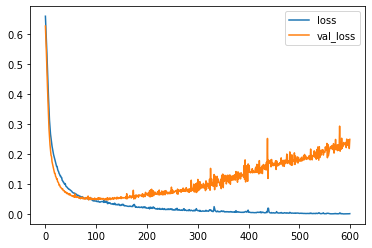

In [28]:
# Validation and training loss differentiate from each other from epoch 100 on
# Validation loss increases because we're overfitting - perfect example
losses.plot()

#### Model 2: Early Stopping

In [33]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
# Early stopping when validation loss stops decreasing
# Early stop is achieved by callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
# Arguments:
# - monitor: value to be monitored -> val_loss: loss of validaton data
# - mode: min -> training stops when monitored value stops decreasing
# - patience: number of epochs with no improvement after which training will be stopped
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [36]:
#help(EarlyStopping)

In [37]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6692 - val_loss: 0.6443
Epoch 2/600
426/426 [==============================] - 0s 97us/sample - loss: 0.6354 - val_loss: 0.6086
Epoch 3/600
426/426 [==============================] - 0s 100us/sample - loss: 0.6021 - val_loss: 0.5702
Epoch 4/600
426/426 [==============================] - 0s 98us/sample - loss: 0.5639 - val_loss: 0.5224
Epoch 5/600
426/426 [==============================] - 0s 99us/sample - loss: 0.5199 - val_loss: 0.4723
Epoch 6/600
426/426 [==============================] - 0s 98us/sample - loss: 0.4742 - val_loss: 0.4243
Epoch 7/600
426/426 [==============================] - 0s 99us/sample - loss: 0.4313 - val_loss: 0.3787
Epoch 8/600
426/426 [==============================] - 0s 98us/sample - loss: 0.3904 - val_loss: 0.3366
Epoch 9/600
426/426 [==============================] - 0s 99us/sample - loss: 0.3548 - val_loss: 0.3010
Epoch 10/600
426/4

In [38]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

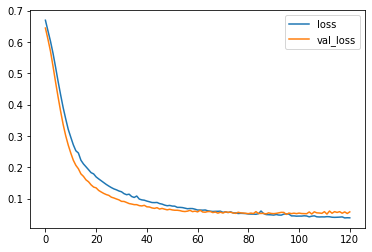

In [39]:
# The training stops before epoch 160, when the validation loss stops decreasing
losses.plot()

#### Model 3: Dropout + Early Stopping

In [40]:
# Add Dropout layers after input and hidden layers
# 
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) # probability of each neuron to drop: 0.5

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5)) # probability of each neuron to drop: 0.5

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
# Early stopping when validation loss stops decreasing
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [42]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6976 - val_loss: 0.6823
Epoch 2/600
426/426 [==============================] - 0s 106us/sample - loss: 0.6981 - val_loss: 0.6592
Epoch 3/600
426/426 [==============================] - 0s 107us/sample - loss: 0.6573 - val_loss: 0.6332
Epoch 4/600
426/426 [==============================] - 0s 107us/sample - loss: 0.6412 - val_loss: 0.5981
Epoch 5/600
426/426 [==============================] - 0s 107us/sample - loss: 0.6129 - val_loss: 0.5617
Epoch 6/600
426/426 [==============================] - 0s 109us/sample - loss: 0.5795 - val_loss: 0.5279
Epoch 7/600
426/426 [==============================] - 0s 120us/sample - loss: 0.5743 - val_loss: 0.4913
Epoch 8/600
426/426 [==============================] - 0s 113us/sample - loss: 0.5479 - val_loss: 0.4622
Epoch 9/600
426/426 [==============================] - 0s 112us/sample - loss: 0.5266 - val_loss: 0.4340
Epoch 10/60

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

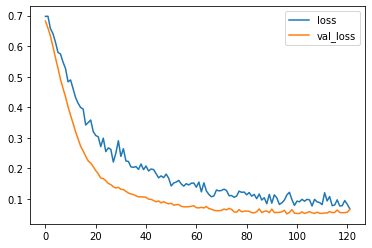

In [44]:
# The development of the losses is much better now
losses.plot()

### 3. Evaluate model

In [45]:
# Old-style class predictions:
# predictions = model.predict_classes(X_test)
# Multiclass classification with softmax in last layer
# np.argmax(model.predict(X_test), axis=-1)
# Binary classification with sigmoid in last layer
prediction = (model.predict(X_test) > 0.5).astype("int32")

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test, prediction))

[[53  1]
 [ 3 86]]


In [48]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.99      0.97      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### 4. Inference

In [49]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_case = df.drop('benign_0__mal_1',axis=1).iloc[random_ind]
new_case

mean radius                  14.450000
mean texture                 20.220000
mean perimeter               94.490000
mean area                   642.700000
mean smoothness               0.098720
mean compactness              0.120600
mean concavity                0.118000
mean concave points           0.059800
mean symmetry                 0.195000
mean fractal dimension        0.064660
radius error                  0.209200
texture error                 0.650900
perimeter error               1.446000
area error                   19.420000
smoothness error              0.004044
compactness error             0.015970
concavity error               0.020000
concave points error          0.007303
symmetry error                0.015220
fractal dimension error       0.001976
worst radius                 18.330000
worst texture                30.120000
worst perimeter             117.900000
worst area                 1044.000000
worst smoothness              0.155200
worst compactness        

In [50]:
# Scale!
# And reshape: Shape must match -> (1,number of features)
# We can pass only numpy arrays
new_case = scaler.transform(new_case.values.reshape(1,30))

In [51]:
prediction = (model.predict(new_case) > 0.5).astype("int32")

In [52]:
prediction

array([[0]], dtype=int32)

In [53]:
# Label / Annotation
df.loc[random_ind,'benign_0__mal_1']

0